In [7]:
# demonstrates how bias and variance interact

import numpy as np
import matplotlib.pyplot as plt

In [54]:
# generate training data (ground truth)
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

N = 50
x = np.linspace(-10, 10, N)
y = f(x)
y_noise = y + 3*(np.random.rand(N)-0.5)

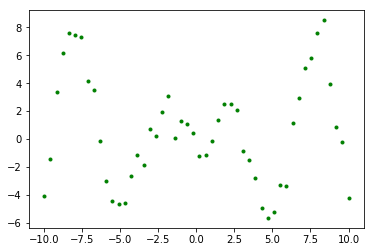

In [55]:
# plot the data
plt.plot(x, y_noise, 'g.')
plt.show()

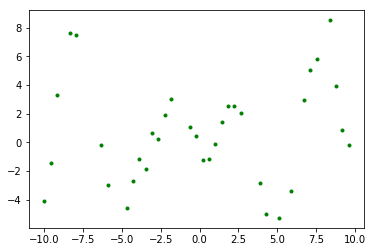

In [56]:
# training and test set split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y_noise, test_size=0.3)
plt.plot(X_train, y_train, 'g.')
plt.show()

d=3, RMSE = 19.69002974011465
d=7, RMSE = 4.533492998799327
d=10, RMSE = 11.117401165552538


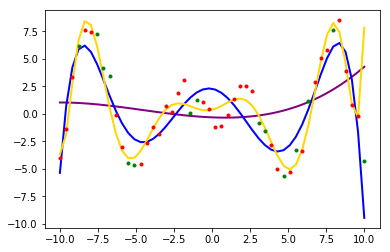

In [61]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# fit a polynomial regression
X_plot = x
colors = ['purple', 'blue', 'gold']
lw = 2

# we can see 3 is underfit, while 10 is overfit
for count, degree in enumerate([3, 7, 10]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X_train.reshape(-1,1), y_train)
    y_plot = model.predict(X_plot.reshape(-1,1))
    plt.plot(X_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)
    y_pred = model.predict(X_test.reshape(-1,1))
    print('d={}, RMSE = {}'.format(degree, mean_squared_error(y_test, y_pred)))
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'g.')
plt.show()

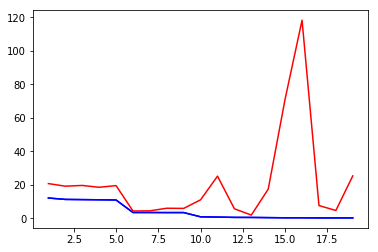

In [63]:
# learning curve to show the train vs test error
train_error = []
test_error = []
degrees = range(1, 20)
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X_train.reshape(-1,1), y_train)
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_pred = model.predict(X_test.reshape(-1,1))
    train_error.append(mean_squared_error(y_train, y_train_pred))
    test_error.append(mean_squared_error(y_test, y_pred))
    
plt.plot(degrees, train_error, 'b')
plt.plot(degrees, test_error, 'r')
plt.show()